Import Required Libraries

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [106]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

Load Dataset

In [107]:
df = pd.read_csv('Path.csv')

In [108]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


Creating Dummies

In [109]:
a=pd.get_dummies(df['Category'])

In [110]:
df.shape

(1490, 3)

In [111]:
df.Text[0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

Checking for Null Values

In [176]:
df.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

Data Pre-Processing

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['worldcom ex-boss launch defence lawyer defending former worldcom chief bernie ebbers battery fraud charge called company whistleblower first witness . cynthia cooper worldcom ex-head internal accounting alerted director irregular accounting practice u telecom giant 2002. warning led collapse firm following discovery $ 11bn ( £5.7bn ) accounting fraud . mr ebbers pleaded guilty charge fraud conspiracy . prosecution lawyer argued mr ebbers orchestrated series accounting trick worldcom ordering employee hide expense inflate revenue meet wall street earnings estimate . m cooper run consulting business told jury new york wednesday external auditor arthur andersen approved worldcom accounting early 2001 2002. said andersen given green light procedure practice used worldcom . mr ebber lawyer said unaware fraud arguing auditor alert problem . m cooper also said shareholder meeting mr ebbers often passed technical question company finance chief giving brief answer . prosecution star witness f

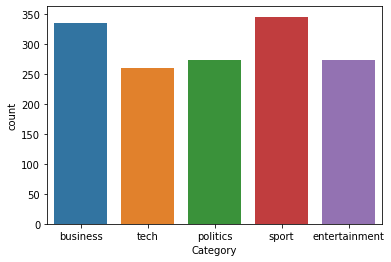

In [112]:


sns.countplot(df.Category)

df.describe()

df.isnull().sum()

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer=WordNetLemmatizer()

list1=[]
for i in range(len(df)):
    sentence=nltk.word_tokenize(df['Text'][i])
    words=[lemmatizer.lemmatize(word) for word in sentence if word not in set(stopwords.words('english'))]
    words=' '.join(words)
    list1.append(words)

list1



In [113]:
df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

Bag of Words

In [121]:
from sklearn.feature_extraction.text import CountVectorizer

In [122]:
cv=CountVectorizer()

In [124]:
X=cv.fit_transform(list1).toarray()
# filename = 'finalized_model.sav'
# pickle.dump(X, open(filename, 'wb'))

In [125]:
X.shape

(1490, 22195)

In [126]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [127]:
y=df['Category']

In [128]:
y

0            business
1            business
2            business
3                tech
4            business
            ...      
1485    entertainment
1486    entertainment
1487         business
1488             tech
1489             tech
Name: Category, Length: 1490, dtype: object

In [129]:
y.shape

(1490,)

In [130]:
y

0            business
1            business
2            business
3                tech
4            business
            ...      
1485    entertainment
1486    entertainment
1487         business
1488             tech
1489             tech
Name: Category, Length: 1490, dtype: object

Replacing Categoricals from Target

In [131]:
y.replace(to_replace={'business':1,'tech':2,'politics':3,'entertainment':4,'sport':5},inplace=True)

Splitting Data

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=52)

SVM

In [134]:
from sklearn.svm import SVC

In [135]:
model=SVC()

In [136]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [137]:
pred=model.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9463087248322147

Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rfpred=rf.predict(X_test)
accuracy_score(rfpred,y_test)

0.9552572706935123

In [140]:
X_train.shape

(1043, 22195)

In [141]:
X_train.shape[1]

22195

In [142]:
X_train

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [143]:
y_train

1053    3
475     1
884     3
885     3
772     3
       ..
924     5
86      3
151     5
779     5
1013    3
Name: Category, Length: 1043, dtype: int64

In [144]:
y_train.shape

(1043,)

Neural Networks

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [146]:
model=Sequential()

In [147]:
model.add(Dense(100,input_dim=22195,activation='sigmoid'))
model.add(Dense(100))
model.add(Dense(200))
model.add(Dense(5,activation='softmax'))

In [148]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [149]:
# # model.summary()
# from keras.wrappers.scikit_learn import KerasClassifier
# def baseline_model():
# 	# create model
# 	model = Sequential()
# 	model.add(Dense(8, input_dim=4, activation='relu'))
# 	model.add(Dense(1, activation='softmax'))
# 	# Compile model
# 	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 	return model

In [150]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [151]:
# kfold = KFold(n_splits=10, shuffle=True)
# results = cross_val_score(estimator, X_train, y_train, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [152]:
import pickle

Splitting for Neural Networks

In [153]:
# from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,a,test_size=0.3,random_state=42)

In [154]:
a

,business,entertainment,politics,sport,tech
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
1485,0,1,0,0,0
1486,0,1,0,0,0
1487,1,0,0,0,0
1488,0,0,0,0,1


In [155]:
X_test.shape

(447, 22195)

In [156]:
model.fit(X_train,y_train,epochs=50,verbose=1)        

Epoch 1/50
33/33 [==============================] - 1s 20ms/step - loss: 0.7708 - accuracy: 0.7709
Epoch 2/50
33/33 [==============================] - 1s 20ms/step - loss: 0.0279 - accuracy: 0.9971
Epoch 3/50
33/33 [==============================] - 1s 20ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 4/50
33/33 [==============================] - 1s 20ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 5/50
33/33 [==============================] - 1s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 6/50
33/33 [==============================] - 1s 20ms/step - loss: 9.3740e-04 - accuracy: 1.0000
Epoch 7/50
33/33 [==============================] - 1s 20ms/step - loss: 7.2656e-04 - accuracy: 1.0000
Epoch 8/50
33/33 [==============================] - 1s 20ms/step - loss: 5.7683e-04 - accuracy: 1.0000
Epoch 9/50
33/33 [==============================] - 1s 20ms/step - loss: 4.7019e-04 - accuracy: 1.0000
Epoch 10/50
33/33 [==============================] - 1s 20ms/step - loss: 3.9361e-04 - accura

In [157]:
y_pred=model.predict(X_test)

In [158]:
X_train.shape[1]

22195

In [160]:
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

Prediction -- Sorting with new Text

In [161]:
aa='japan economy slide recession japanese economy officially gone back recession fourth time decade'

In [162]:
new=cv.transform([aa])

In [170]:
# model.predict_classes(new) predict_classes is deprecated

In [174]:
to_pred = input("** Enter your text: ")
news=cv.transform([to_pred])
op=np.argmax(model.predict(new), axis=-1)
if op==1:
  print ("Business")
elif op==2:
  print("Technology")
elif op==3:
  print("Politics")
elif op=="4":
  print("Entertainment")
else:
  print("Sport")

** Enter your text: japan economy slide recession japanese economy officially gone back recession fourth time decade
Politics
